In [3]:
from utils import (
    cost_function,
    find_best_individual,
    roulette_reproduction,
    one_point_crossover,
    gauss_mutation,
    init_population,
    cube_constrains,
    roulette_reproduction_weak,
)
from algorithm import evolution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
population = init_population(cube_constrains, 100)
point, cost, history = evolution(cost_function, roulette_reproduction, population, .1, 0.8, 500)
print(point, cost)

[1.00094962 0.99245608] 21.442428636349444


## roulette reproduction: traditional vs min max
traditional - formula from lecture's notes
min max - applied min max scaler - described in roulette_reproduction in utils.py

In [5]:
# data preparation
min_max_best_costs = []
for _ in range(20):
    population = init_population(cube_constrains, 100)
    point, cost, history = evolution(cost_function, roulette_reproduction, population, .1, 0.8, 500)
    min_max_best_costs.append(cost)
min_max_best_costs_np = np.array(min_max_best_costs)
min_max_median = np.median(min_max_best_costs)

traditional_best_costs = []
for _ in range(20):
    population = init_population(cube_constrains, 100)
    point, cost, history = evolution(cost_function, roulette_reproduction_weak, population, .1, 0.8, 500)
    traditional_best_costs.append(cost)
traditional_best_costs_np = np.array(traditional_best_costs)
traditional_median = np.median(traditional_best_costs)

print(f"min max median: {min_max_median}\n traditional median: {traditional_median}")

min max median: 21.43802212767485
 traditional median: 27.446172006172812


Text(0.5, 1.0, 'median of cost for different types of roulet. reprod.')

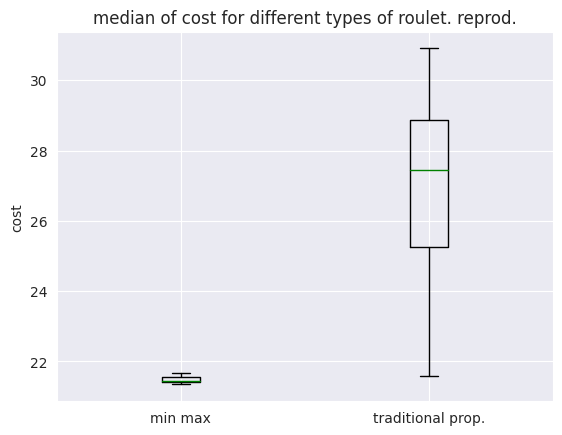

In [16]:
# plotting
fig, ax = plt.subplots()
ax.boxplot([min_max_best_costs_np, traditional_best_costs_np])
plt.xticks([1, 2], ["min max", "traditional prop."])
plt.ylabel("cost")
plt.title("median of cost for different types of roulet. reprod.")

In [7]:
traditional_histories = []
min_max_histories = []
for _ in range(10):
    population = init_population(cube_constrains, 100)
    _, _, traditional_history = evolution(cost_function, roulette_reproduction_weak, population, .1, 0.8, 500)
    _, _, min_max_history = evolution(cost_function, roulette_reproduction, population, .1, 0.8, 500)
    traditional_histories.append(traditional_history)
    min_max_histories.append(min_max_history)

Text(0.5, 1.0, 'best cost after iteration different types of roulet. reprod.')

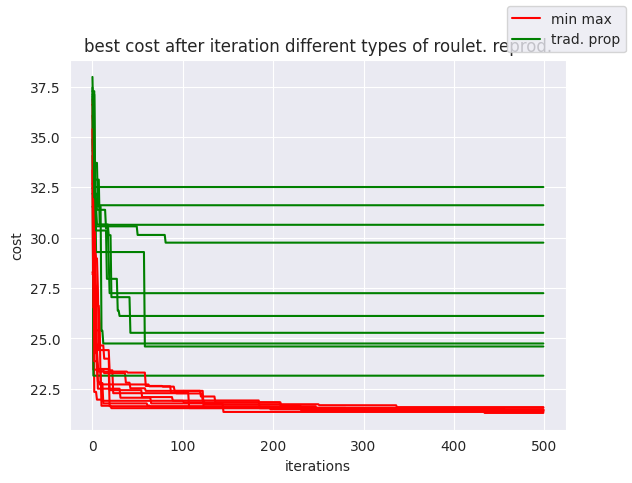

In [17]:
fig, ax = plt.subplots()
for min_max, traditional in zip(min_max_histories, traditional_histories):
    ax.plot(min_max, "r")
    ax.plot(traditional, "g")
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
fig.legend(["min max", "trad. prop"])
plt.title("best cost after iteration different types of roulet. reprod.")

#### conclusion
Pluging in min max scaler into roulette reproduction stresses difference between individuals, results are really significant

## mutation strength

In [9]:
coefficients_histories = []
costs =[]
coefficients = [0.001, 0.01, 0.1, 0.4, 0.6, 0.8, 1.2, 1.6]
population = init_population(cube_constrains, 100)
for coef in coefficients:
    coef_histories = []
    for _ in range(1):
        _, cost, history = evolution(cost_function, roulette_reproduction, population, coef, 0.8, 500)
        coef_histories.append(history)
        costs.append(cost)
    coefficients_histories.append(coef_histories)

In [10]:
print(costs)

[21.26862973994028, 21.269501750226237, 21.455699969150928, 21.85758739949639, 23.159602088756365, 24.943388842918505, 24.893592978755862, 32.431623541034064]


Text(0.5, 1.0, 'mutation strength coefficient')

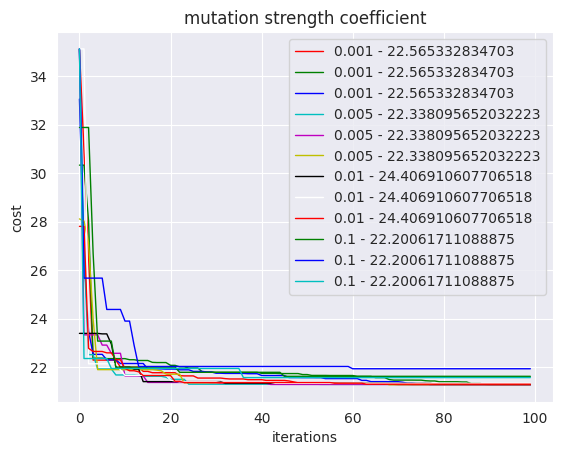

In [19]:
fig, ax = plt.subplots()
from cycler import cycler

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'])))
for index, coef_histories in enumerate(coefficients_histories):
    for coef_history in coef_histories:
        ax.plot(coef_history, linewidth="1", label=f"{coefficients[index]} - {costs[index]}")
plt.legend()
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
plt.title("mutation strength coefficient")

#### conclusions 1/2
need to focus on smaller coefficients => continuation of experiments

In [12]:
coefficients_histories = []
costs = []
coefficients = [0.001, 0.005, 0.01, 0.1]
population = init_population(cube_constrains, 100)
for coef in coefficients:
    coef_histories = []
    for _ in range(3):
        _, cost, history = evolution(cost_function, roulette_reproduction, population, coef, 0.8, 100)
        coef_histories.append(history)
        costs.append(cost)
    coefficients_histories.append(coef_histories)

Text(0.5, 1.0, 'mutation strength coefficient')

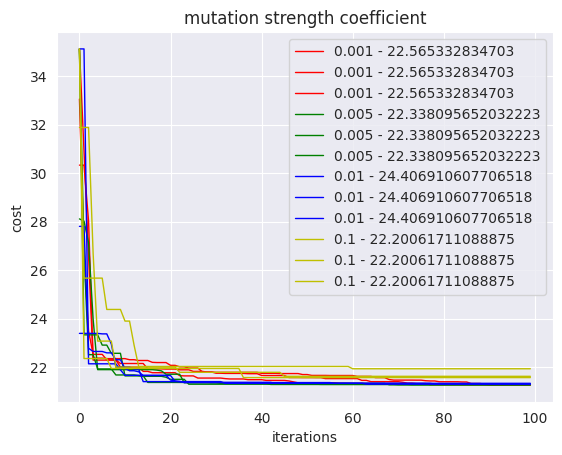

In [20]:
fig, ax = plt.subplots()
from cycler import cycler

# plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
colors = ['r', 'g', 'b', 'y']
for index, coef_histories in enumerate(coefficients_histories):
    for coef_history in coef_histories:
        ax.plot(coef_history, color=colors[index], linewidth="1", label=f"{coefficients[index]} - {costs[index]}")
plt.legend()
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
plt.title("mutation strength coefficient")

#### conclusions 2/2
optimal range of mutation strength is below 0.1

given cube constrains starting point is not far away from minium

All scores from given range give acceptable results, hover we can observe following rule:
bigger coefficient -> fewer iterations to achieve satisfying result
smaller coefficient -> bigger precision, score slightly better

## population size
population size is very important in comparison to other hyperparams

In [14]:
populations_histories = []
costs = []
populations = [20, 100, 200]
population = init_population(cube_constrains, 100)
for pop in populations:
    pop_histories = []
    for _ in range(3):
        _, cost, history = evolution(cost_function, roulette_reproduction, population, 0.01, 0.8, pop)
        pop_histories.append(history)
        costs.append(cost)
    populations_histories.append(pop_histories)

Text(0.5, 1.0, 'population size')

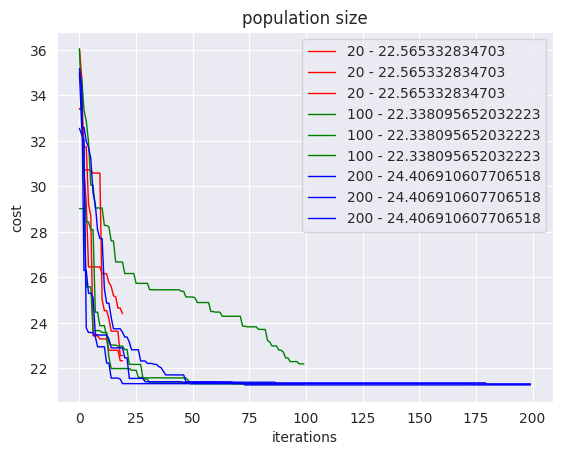

In [21]:
fig, ax = plt.subplots()
from cycler import cycler

# plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
colors = ['r', 'g', 'b']
for index, pop_histories in enumerate(populations_histories):
    for pop_history in pop_histories:
        ax.plot(pop_history, color=colors[index], linewidth="1", label=f"{populations[index]} - {costs[index]}")
plt.legend()
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
plt.title("population size")